# Сегментация покупателей интернет-магазина

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Материалы" data-toc-modified-id="Материалы-1">Материалы</a></span><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-2">Введение</a></span></li><li><span><a href="#Раздел-1.-Изучение-и-предобработка-данных" data-toc-modified-id="Раздел-1.-Изучение-и-предобработка-данных-3">Раздел 1. Изучение и предобработка данных</a></span></li><li><span><a href="#Раздел-2.-Исследовательский-анализ-данных" data-toc-modified-id="Раздел-2.-Исследовательский-анализ-данных-4">Раздел 2. Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Раздел-2.1.-Проверка-корректности-данных" data-toc-modified-id="Раздел-2.1.-Проверка-корректности-данных-4.1">Раздел 2.1. Проверка корректности данных</a></span></li><li><span><a href="#Раздел-2.2.-Сегментация-товаров" data-toc-modified-id="Раздел-2.2.-Сегментация-товаров-4.2">Раздел 2.2. Сегментация товаров</a></span></li><li><span><a href="#Раздел-2.3.-Сегментация-клиентов" data-toc-modified-id="Раздел-2.3.-Сегментация-клиентов-4.3">Раздел 2.3. Сегментация клиентов</a></span></li></ul></li><li><span><a href="#Раздел-3.-Проверка-статистических-гипотез" data-toc-modified-id="Раздел-3.-Проверка-статистических-гипотез-5">Раздел 3. Проверка статистических гипотез</a></span></li><li><span><a href="#Раздел-4.-Выводы-и-рекомендации-по-работе-с-группами-клиентов" data-toc-modified-id="Раздел-4.-Выводы-и-рекомендации-по-работе-с-группами-клиентов-6">Раздел 4. Выводы и рекомендации по работе с группами клиентов</a></span><ul class="toc-item"><li><span><a href="#Раздел-4.1.-Общие-выводы" data-toc-modified-id="Раздел-4.1.-Общие-выводы-6.1">Раздел 4.1. Общие выводы</a></span></li><li><span><a href="#Раздел-4.2.-Рекомендации-по-работе-с-клиентами" data-toc-modified-id="Раздел-4.2.-Рекомендации-по-работе-с-клиентами-6.2">Раздел 4.2. Рекомендации по работе с клиентами</a></span></li></ul></li></ul></div>

# Введение

Перед нами представлена информация о транзакциях интернет-магазина товаров для дома и быта «Пока все ещё тут». Таблица содержит следующие данные:
- date — дата заказа;
- customer_id — идентификатор покупателя;
- order_id — идентификатор заказа;
- product — наименование товара;
- quantity — количество товара в заказе;
- price — цена товара.

<b> Цель работы: </b>Сегментация покупателей по профилю потребления для дальнейшей диверсификации способов воздействия на них.

Предложенный тип сегментации основывается на типе приобретаемого товара.

В связи с заявленной целью возникают <b>следующие задачи</b>:
- выяснить, каким образом провести сегментацию товаров;
- провести сегментацию клиентов на основе категорий приобретаемых товаров;
- проверить гипотезу о том, что клиенты, покупающие товары определенных категорий, тратят на покупки больше денег, чем остальные клиенты;
- проверить гипотезу о том, что клиенты, покупающие товары определенных категорий, делают покупки чаще, чем остальные клиенты;
- дать рекомендации по работе с клиентами в зависимости от их сегмента.

# Раздел 1. Изучение и предобработка данных

Для начала загрузим файл с данными и посмотрим на них.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
from io import BytesIO
import requests

spreadsheet_id = '_'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data = pd.read_csv(BytesIO(r.content))
data

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
6732,2019103111,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0
6733,2019103112,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019103113,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0
6735,2019103114,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null int64
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


У нас есть данные о 6737 покупках - причем в одном чеке одного клиента может быть несколько покупок. Колонки названы корректно и отражают находящиеся в них данные. Пропущенных значений нет. Тип данных в столбцах соответствует предоставленным значениям во все колонках, кроме колонки с датой - его его нужно будет привести к верному типу. Кроме этого, посмотрим, есть ли в таблице дубликаты.

In [4]:
data['date'] = pd.to_datetime(data['date'].astype(str), format='%Y%m%d%H')

In [5]:
data

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0
6735,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


Создадим также отдельный столбец с датой.

In [6]:
data['date_day'] = data['date'].dt.date

In [7]:
data

,date,customer_id,order_id,product,quantity,price,date_day
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01
...,...,...,...,...,...,...,...
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0,2019-10-31
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,2019-10-31
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0,2019-10-31
6735,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0,2019-10-31


Проверим, есть ли в нашем датасете дубликаты.

In [8]:
data[data.duplicated() == True]

,date,customer_id,order_id,product,quantity,price,date_day


Возможно, есть "скрытые дубликаты" - проверим, не было ли задвоений в заказах.

In [9]:
data[data.duplicated(subset=['customer_id', 'order_id', 'product']) == True]

,date,customer_id,order_id,product,quantity,price,date_day
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,2018-10-02
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,2018-10-02
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,2018-10-02
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,2018-10-03
94,2018-10-04 13:00:00,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,Эвкалипт Гунни d-17 см h-60 см,1,1409.0,2018-10-04
...,...,...,...,...,...,...,...
6706,2019-10-28 10:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,Сумка-тележка 2-х колесная Gimi Argo красная,1,1087.0,2019-10-28
6711,2019-10-28 21:00:00,cb65d08a-dae7-4890-aef0-bb9f79055e02,73108,Мирт d-9 см h-15 см,1,134.0,2019-10-28
6728,2019-10-31 00:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0,2019-10-31
6729,2019-10-31 02:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0,2019-10-31


Получилась интересная ситуация: 1866 строк - больше четверти от всего датасета - содержит дублирующиеся данные: т.е. один и тот же заказ одного и того же пользователя в системе отображается несколько раз. 
На примере b731df05-98fa-4610-8496-716ec530a02c и его заказа 68474: первый раз заказ был зафиксирован, а затем он повторяется в 18:00, 19:00, 20:00 и 04:00 следующего дня. В чем может быть причина? Т.к. речь идет об интернет-магазине, то, возможно, речь идет о разных операциях, которые могли смешаться в одном датасете. Возможно, речь о возвратах, или каких-то корретировках в заказе, типа уточнения места доставки. В любом случае, лучше обратиться к разработчику, чтобы выяснить причину такого явления. Т.к. у нас такой возможности нет, то сделаем предположение, что ошибка в сборе данных имеет место быть, а значит надо удалить дублирующиеся строки, чтобы избежать искажения в анализе данных. 

In [10]:
data=data.drop_duplicates(['customer_id', 'order_id', 'product']).reset_index(drop=True)

In [11]:
data

,date,customer_id,order_id,product,quantity,price,date_day
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01
...,...,...,...,...,...,...,...
4846,2019-10-31 11:00:00,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,Мимоза стыдливая d-9 см,1,329.0,2019-10-31
4847,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0,2019-10-31
4848,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,2019-10-31
4849,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0,2019-10-31


Таким образом, в нашем датасете осталась информация о 4850 покупках. Можно приступить к анализу данных.

# Раздел 2. Исследовательский анализ данных

## Раздел 2.1. Проверка корректности данных

Посмотрим, все ли значения по столбцам заданы корректно и нет ли у нас в данных выпадающих значений.

In [12]:
data['quantity'].describe()

count    4851.000000
mean        2.833643
std        17.642900
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1000.000000
Name: quantity, dtype: float64

In [13]:
data['price'].describe()

count     4851.000000
mean       516.063698
std        946.096518
min          9.000000
25%         90.000000
50%        150.000000
75%        502.000000
max      14917.000000
Name: price, dtype: float64

In [14]:
data['date_day'].min()

datetime.date(2018, 10, 1)

In [15]:
data['date_day'].max()

datetime.date(2019, 10, 31)

In [16]:
len(data['product'].unique())

2343

В нашей таблице представлена информация о заказах с 1 октября 2018 по 31 октября 2019. Всего клиенты покупали 2343 вида товаров. 

Самый дешевый товар стоил 9 (будем считать, что рублей), а самый дорогой - 14917. Похоже на выброс, который может исказить дальнейший анализ. Каждого товара покупалось в основном по 1 штуке, но какой-то товар был куплен в количестве 1000 штук - это ошибка в данных или действительно такое количество товара может кому-то потребоваться? Исследуем это далее, построив boxplot.

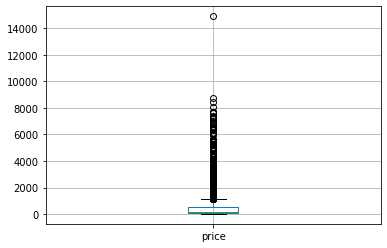

In [17]:
data_price = data[['price']]
data_price.boxplot()

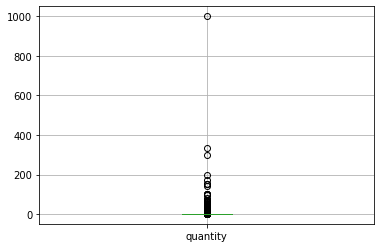

In [18]:
data_quantity = data[['quantity']]
data_quantity.boxplot()

Значения цены выше 400 рублей выходят за границы "стандартных" (выше 75%-процентиля), однако их много,т.к., действительно, в хозяйственном магазине могут продаваться товары разного ценового диапазона. Единственное значение, которое сильно выделяется из остальных - это точка максимума (14917 руб.)
По количеству товара ситуация похожа. Аномалией выглядит значение в 1000 купленных единиц продукции. Однако вызывает вопросы и всё, что больше 100: чего можно было купить так много? Посмотрим на эти данные подробнее.

In [19]:
data_big_price = data.query('price == 14917')
data_big_price

,date,customer_id,order_id,product,quantity,price,date_day
4197,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400...,1,14917.0,2019-07-29


Уличная сушилка за 14917 рублей - звучит разумно. Такая покупка была всего одна, но клиент может оказаться важным для анализа. Удалять эту строку не будем.

In [20]:
data_big_quantity = data.query('quantity > 100')
data_big_quantity

,date,customer_id,order_id,product,quantity,price,date_day
197,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Крепеж для пружины дверной, 1107055",150,19.0,2018-10-11
198,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,Пружина дверная 240 мм оцинкованная (Д-19 мм) ...,150,38.0,2018-10-11
485,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,Муляж ЯБЛОКО 9 см красное,170,51.0,2018-11-01
503,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,Муляж ЯБЛОКО 9 см красное,140,59.0,2018-11-02
1014,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200,29.0,2018-12-10
2073,2019-03-23 10:00:00,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,Плечики пластмассовые Размер 52 - 54 Тула 1205158,150,20.0,2019-03-23
3382,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51.0,2019-05-20
3751,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0,2019-06-11
3819,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0,2019-06-18


Всего было 8 заказов с 9 позициями, в которых присутствует более 100 штук товара. Крепежи, пружины, вешалки, вантузы и предметы декора. Похоже, в нашем магазине закупаются оптовики, которые затем перепродают товар куда-то еще. Первая рекомендация для менеджеров: если мы не хотим способствовать работе оптовиков - делать на сайте ограничение на покупку количества единиц товара (например, до 100 штук). Если нас это не волнует, то можно оставить всё как есть.

Посмотрим также, информация о скольки покупателях и заказах хранится в нашем датасете.

In [21]:
data['customer_id'].value_counts()

c971fb21-d54c-4134-938f-16b62ee86d3b    143
d3b9ffea-d143-4747-8d59-74ab843d1ad6     51
4d93d3f6-8b24-403b-a74b-f5173e40d7db     45
760aa067-90c3-4794-b7a9-a8831197388b     36
2a0acc09-e343-4f92-b5c0-f598ef2b07d4     31
                                       ... 
0c903c67-9ebf-4401-a293-78e10245164f      1
79d976cb-3ea9-4dd9-8b01-17bf3f976366      1
9fd9a54d-e6c1-4b13-922a-af344a8ea94b      1
8c290149-ad54-4d7a-87a7-9386b36390ee      1
6d4bd7d2-52f3-40e4-b394-80da6f977f1f      1
Name: customer_id, Length: 2451, dtype: int64

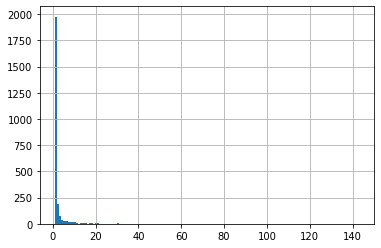

In [22]:
data['customer_id'].value_counts().hist(bins=143)

In [23]:
data['order_id'].value_counts()

14698    51
14715    36
14688    31
14753    30
14705    29
         ..
68723     1
72817     1
70764     1
72805     1
69638     1
Name: order_id, Length: 2784, dtype: int64

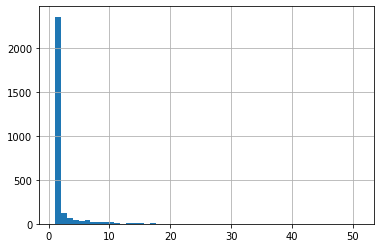

In [24]:
data['order_id'].value_counts().hist(bins=51)

4851 транзакция была осуществлена 2451 покупателем в 2784 заказах. Т.е. почти 90% покупателей нашего сайта сделали за год всего 1 заказ! Абсолютное большинство из этих заказов содержали только 1 позицию, хотя были и исключения: до 51 позиций в чеке. Скорее всего это были те самые обнаруженные ранее оптовые покупатели. Есть у нас также уникальный клиент, который сделал 143 заказа. Мы оставим его для анализа, но уберем на момент кластеризации, чтобы избежать искажения картинки.

Кажется не очень корректным классифицировать покупателей по единственному совершенному заказу. Однако т.к. мы располагаем данными только одного датасета, то попробуем сделать классификацию по имеющимся данным.

Посмотрим также, как выглядела динамика выручки нашего магазина за имеющийся период.

Добавим колонку с выручкой.

In [25]:
data['revenue'] = data['quantity'] * data['price']

In [26]:
date_revenue = data.groupby('date_day')['revenue'].sum().reset_index()
date_revenue

,date_day,revenue
0,2018-10-01,13934.0
1,2018-10-02,16746.0
2,2018-10-03,7275.0
3,2018-10-04,25170.0
4,2018-10-05,4720.0
...,...,...
386,2019-10-27,626.0
387,2019-10-28,6540.0
388,2019-10-29,642.0
389,2019-10-30,7809.0


Text(0, 0.5, 'Выручка')

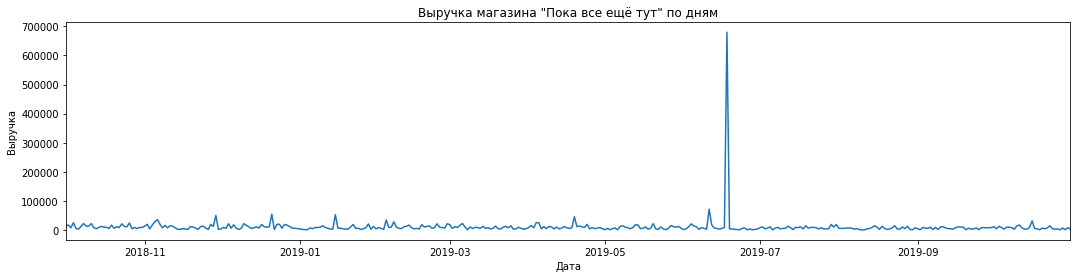

In [27]:
revenue_per_day_plot = date_revenue.plot('date_day', 'revenue', figsize = (18, 4), title='Выручка магазина "Пока все ещё тут" по дням', legend=False)
revenue_per_day_plot.set_xlabel('Дата')
revenue_per_day_plot.set_ylabel('Выручка')

In [28]:
date_revenue.iloc[date_revenue['revenue'].idxmax()]

date_day    2019-06-18
revenue         679944
Name: 257, dtype: object

Что-то произошло 18 июня. Продажи взлетели больше, чем в 7 раз. Посмотрим, был ли замечен такой же всплеск в количестве заказов.

In [29]:
date_orders = data.groupby('date_day')['order_id'].nunique().reset_index()
date_orders

,date_day,order_id
0,2018-10-01,11
1,2018-10-02,14
2,2018-10-03,7
3,2018-10-04,11
4,2018-10-05,7
...,...,...
386,2019-10-27,3
387,2019-10-28,6
388,2019-10-29,3
389,2019-10-30,12


Text(0, 0.5, 'Количество заказов')

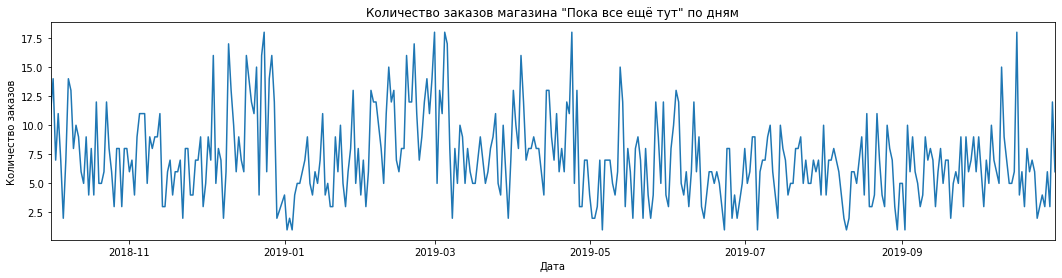

In [30]:
date_orders_plot = date_orders.plot('date_day', 'order_id', figsize = (18,4), title='Количество заказов магазина "Пока все ещё тут" по дням', legend=False)
date_orders_plot.set_xlabel('Дата')
date_orders_plot.set_ylabel('Количество заказов')

А здесь такого всплеска мы не видим. Тогда посмотрим, что за заказы пришлись на дату 18 июня.

In [31]:
import datetime 
filter_date = datetime.date(2019,6,18)
data_june18 = data[data['date_day'] == filter_date]
data_june18

,date,customer_id,order_id,product,quantity,price,date_day,revenue
3815,2019-06-18 04:00:00,997658b1-66c1-4858-a852-50b2d33f2eaf,71732,"Таз пластмассовый 24,0 л пищевой круглый (Иж),...",1,239.0,2019-06-18,239.0
3816,2019-06-18 05:00:00,11394ce3-31bd-4d86-a9d6-4f7661cd96eb,71733,"Сумка-тележка TWIN стальной каркас 56 л синяя,...",1,2549.0,2019-06-18,2549.0
3817,2019-06-18 09:00:00,b3a1c618-6267-4a54-81c4-a1bd2d35d00b,71736,Пеларгония розебудная Prins Nikolai укорененны...,2,134.0,2019-06-18,268.0
3818,2019-06-18 11:00:00,705b09dc-2a15-4081-9fb2-58db9e3ebb4d,71738,"Таз пластмассовый 24,0 л пищевой круглый (Иж),...",1,239.0,2019-06-18,239.0
3819,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0,2019-06-18,675000.0
3820,2019-06-18 16:00:00,3cfed4c4-1f28-49a0-8502-a6bc7a091cc2,71744,Гладильная доска НИКА 9 122х40 см Н9,1,1649.0,2019-06-18,1649.0


Опять мы вернулись к пользователю с купленными 1000 вантузами. Если в данных и нет ошибки, то такой клиент в любом случае сильно влияет на статистику. Будем считать его "выбросом" и удалим из таблицы.

In [32]:
data = data.drop(labels=3819, axis = 0)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4850 entries, 0 to 4850
Data columns (total 8 columns):
date           4850 non-null datetime64[ns]
customer_id    4850 non-null object
order_id       4850 non-null int64
product        4850 non-null object
quantity       4850 non-null int64
price          4850 non-null float64
date_day       4850 non-null object
revenue        4850 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 341.0+ KB


В датасете осталась информация о 4850 покупках.

## Раздел 2.2. Сегментация товаров

Добавим к датасету еще одну колонку - категорию товаров, к которому относится приобретенная позиция. Классификация сделана в Excel по принципу отделов магазинов c товарами для строительства и ремонта по типу Leroy Merlen.

<i>Классияикация проводилась по выгруженному в Excel исходному датасету. Вручную прописывались категории для товаров по фильтрам с разными, наиболее часто встречающимися зрительно словами или частями слов. Например, "ванн" содержалось в бОльшей части названий товаров категории Ванная. Некоторые обозначения, например, h, были характерны в основном для описания высоты растений, вручную просматривалось, всегда ли это так или есть исключения. Если попадался неизвестный товар, он был просмотрен на сайте Leroy Merlen для отнесения к нужной категории. </i>

In [34]:
spreadsheet_id = '1gmheZ7cR-zOlWEjViy-TarguMCM_OqdMavEQVDDOeCg'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
dictionary = pd.read_csv(BytesIO(r.content))
dictionary

,product,type
0,Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759,Кухня
1,Tepмокружка AVEX Freeflow 700 мл сталь AVEX0776,Кухня
2,Tepмокружка AVEX Recharge 500 мл голубой AVEX0681,Кухня
3,Автоматическая щетка Leifheit для мытья окон с...,Хозяйственные товары
4,Агератум рассада однолетних цветов в кассете п...,Сад
...,...,...
2338,"Ясколка Войлочная белая объем 0,5 л",Сад
2339,"Ящик для хранения TEXTILEBOX CURVER 5,7 л 34x2...",Хранение
2340,Ящик для хранения Фимако Люкс плетеный с крышк...,Хранение
2341,Ящик почтовый металлический с врезным замком П...,Хранение


In [35]:
data = data.merge(dictionary, how='left', on='product')

In [36]:
data.head(5)

,date,customer_id,order_id,product,quantity,price,date_day,revenue,type
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,142.0,Декор
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,194.0,Декор
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,112.0,Декор
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,179.0,Декор
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,112.0,Декор


Теперь проведем сравнение показателей выручки, получаемой от продажи товаров разных категорий и сравнение количества товара, проданного в каждой категории.

Text(0, 0.5, 'Выручка, руб.')

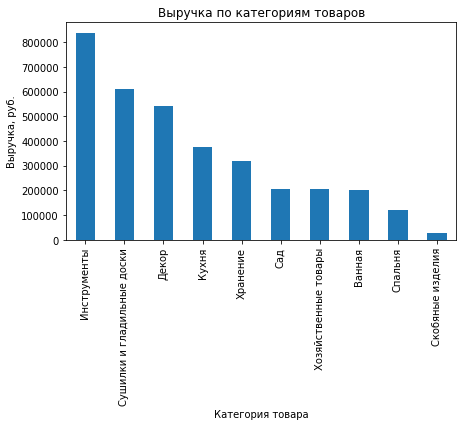

In [37]:
revenue_by_type_plot = data.groupby(by='type')['revenue'].sum().sort_values(ascending = False)\
                        .plot(kind = 'bar', figsize = (7,4), title='Выручка по категориям товаров')
revenue_by_type_plot.set_xlabel('Категория товара')
revenue_by_type_plot.set_ylabel('Выручка, руб.')

Text(0, 0.5, 'Количество товара, ед.')

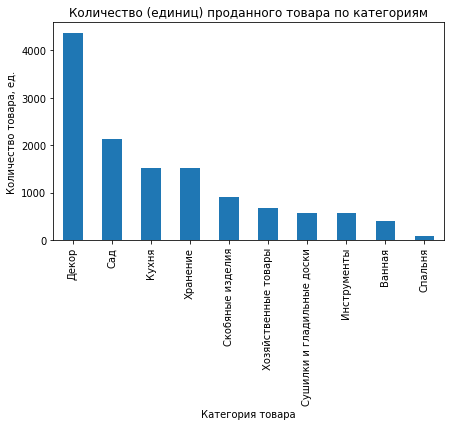

In [38]:
quantity_by_type_plot = data.groupby(by='type')['quantity'].sum().sort_values(ascending = False)\
                        .plot(kind = 'bar', figsize = (7,4), title='Количество (единиц) проданного товара по категориям')
quantity_by_type_plot.set_xlabel('Категория товара')
quantity_by_type_plot.set_ylabel('Количество товара, ед.')

Топ-3 категории товаров, которая приносит нам больше всего денег: Инструменты, Сушилки и гладильные доски и Декор. По количеству продаваемых единиц товара топ несколько отличается: это Декор, Сад и Кухня - очевидно, наши покупатели очень любят цветы, в любом виде (семена и рассаду из категории Сад и комнатные растения из Декора). Самая непопулярная категория - Спальня. Здесь очень мало выручки и мало проданных единиц товара. Нужно расширять ассортимент популярных категорий товаров (особенно наиболее прибыльных), тратить усилия на развитие малопопулярных категорий не стоит.

## Раздел 2.3. Сегментация клиентов

Для того, чтобы классифицировать покупателей с учетом категории покупаемых ими товаров, создадим таблицу со следующими столбцами:
- customer_id,
- number_of_orders - количество заказов за исследуемый период,
- revenue - сумма, потраченная на покупки,
- avg_number_of_positions - среднее количество позиций в заказе,
- number_of_categories - сколько категорий товаров покупает,
- факт покупки товара из конкретной категории (0 или 1).

In [39]:
data_for_classification = data.groupby('customer_id').agg({'order_id': 'count', 'revenue': 'sum', 'type':'nunique'})

In [40]:
data_for_classification.columns = ['number_of_orders', 'revenue', 'number_of_categories']
data_for_classification = data_for_classification.reset_index()
data_for_classification

,customer_id,number_of_orders,revenue,number_of_categories
0,000d6849-084e-4d9f-ac03-37174eaf60c4,4,555.0,1
1,001cee7f-0b29-4716-b202-0042213ab038,1,442.0,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,1,914.0,1
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,1649.0,1
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1,2324.0,1
...,...,...,...,...
2445,ff601403-b094-4b86-9ac6-264d725b9277,1,1649.0,1
2446,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1,397.0,1
2447,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,1,389.0,1
2448,ffb80538-3fda-4351-8ea9-9d2bec58bb07,1,974.0,1


Отдельно посчитаем среднее количество позиций в заказе для каждого покупателя.

In [41]:
data_avg_number = data.groupby(['customer_id', 'order_id'])['product'].count().reset_index()

In [42]:
data_avg_number

,customer_id,order_id,product
0,000d6849-084e-4d9f-ac03-37174eaf60c4,14943,4
1,001cee7f-0b29-4716-b202-0042213ab038,70290,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,72965,1
3,002d4d3a-4a59-406b-86ec-c3314357e498,69990,1
4,003bbd39-0000-41ff-b7f9-2ddaec152037,72796,1
...,...,...,...
2811,ff601403-b094-4b86-9ac6-264d725b9277,72313,1
2812,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,1
2813,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,69369,1
2814,ffb80538-3fda-4351-8ea9-9d2bec58bb07,72561,1


In [43]:
len(data_avg_number['product'])

2816

In [44]:
data_avg_number_of_positions = data_avg_number.groupby('customer_id')['product'].mean().reset_index()

In [45]:
data_avg_number_of_positions.columns = ['customer_id', 'avg_number_of_positions']

In [46]:
data_avg_number_of_positions

,customer_id,avg_number_of_positions
0,000d6849-084e-4d9f-ac03-37174eaf60c4,4.0
1,001cee7f-0b29-4716-b202-0042213ab038,1.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,1.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1.0
...,...,...
2445,ff601403-b094-4b86-9ac6-264d725b9277,1.0
2446,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1.0
2447,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,1.0
2448,ffb80538-3fda-4351-8ea9-9d2bec58bb07,1.0


In [47]:
data_for_classification = data_for_classification.merge(data_avg_number_of_positions, how='left', on='customer_id')

In [48]:
data_for_classification

,customer_id,number_of_orders,revenue,number_of_categories,avg_number_of_positions
0,000d6849-084e-4d9f-ac03-37174eaf60c4,4,555.0,1,4.0
1,001cee7f-0b29-4716-b202-0042213ab038,1,442.0,1,1.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,1,914.0,1,1.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,1649.0,1,1.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1,2324.0,1,1.0
...,...,...,...,...,...
2445,ff601403-b094-4b86-9ac6-264d725b9277,1,1649.0,1,1.0
2446,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1,397.0,1,1.0
2447,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,1,389.0,1,1.0
2448,ffb80538-3fda-4351-8ea9-9d2bec58bb07,1,974.0,1,1.0


Теперь добавим данные по покупке товаров той или иной категории.

In [49]:
data_categories = pd.get_dummies(data, columns=['type'])

In [50]:
data_categories

,date,customer_id,order_id,product,quantity,price,date_day,revenue,type_Ванная,type_Декор,type_Инструменты,type_Кухня,type_Сад,type_Скобяные изделия,type_Спальня,type_Сушилки и гладильные доски,type_Хозяйственные товары,type_Хранение
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,142.0,0,1,0,0,0,0,0,0,0,0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,194.0,0,1,0,0,0,0,0,0,0,0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,112.0,0,1,0,0,0,0,0,0,0,0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,179.0,0,1,0,0,0,0,0,0,0,0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,112.0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4845,2019-10-31 11:00:00,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,Мимоза стыдливая d-9 см,1,329.0,2019-10-31,329.0,0,1,0,0,0,0,0,0,0,0
4846,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0,2019-10-31,404.0,0,0,0,1,0,0,0,0,0,0
4847,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,2019-10-31,1087.0,0,0,1,0,0,0,0,0,0,0
4848,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0,2019-10-31,157.0,0,1,0,0,0,0,0,0,0,0


In [51]:
types = ['type_Ванная','type_Декор', 'type_Инструменты', 'type_Кухня', 'type_Сад', 'type_Скобяные изделия', 'type_Спальня', 'type_Сушилки и гладильные доски','type_Хозяйственные товары', 'type_Хранение']
data_categories_groupby = data_categories.groupby('customer_id')[types].sum()

In [52]:
data_categories_groupby

,type_Ванная,type_Декор,type_Инструменты,type_Кухня,type_Сад,type_Скобяные изделия,type_Спальня,type_Сушилки и гладильные доски,type_Хозяйственные товары,type_Хранение
customer_id,,,,,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,0,4,0,0,0,0,0,0,0,0
001cee7f-0b29-4716-b202-0042213ab038,0,0,0,0,0,0,0,1,0,0
00299f34-5385-4d13-9aea-c80b81658e1b,0,0,0,0,0,0,0,0,1,0
002d4d3a-4a59-406b-86ec-c3314357e498,0,0,1,0,0,0,0,0,0,0
003bbd39-0000-41ff-b7f9-2ddaec152037,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
ff601403-b094-4b86-9ac6-264d725b9277,0,0,1,0,0,0,0,0,0,0
ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1,0,0,0,0,0,0,0,0,0
ffb5976a-7a4d-460b-95c4-5ffaba31cb24,0,1,0,0,0,0,0,0,0,0


In [53]:
for col in data_categories_groupby.columns:
    data_categories_groupby.loc[data_categories_groupby[col] > 1, col] = 1

In [54]:
data_categories_groupby

,type_Ванная,type_Декор,type_Инструменты,type_Кухня,type_Сад,type_Скобяные изделия,type_Спальня,type_Сушилки и гладильные доски,type_Хозяйственные товары,type_Хранение
customer_id,,,,,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,0,1,0,0,0,0,0,0,0,0
001cee7f-0b29-4716-b202-0042213ab038,0,0,0,0,0,0,0,1,0,0
00299f34-5385-4d13-9aea-c80b81658e1b,0,0,0,0,0,0,0,0,1,0
002d4d3a-4a59-406b-86ec-c3314357e498,0,0,1,0,0,0,0,0,0,0
003bbd39-0000-41ff-b7f9-2ddaec152037,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
ff601403-b094-4b86-9ac6-264d725b9277,0,0,1,0,0,0,0,0,0,0
ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1,0,0,0,0,0,0,0,0,0
ffb5976a-7a4d-460b-95c4-5ffaba31cb24,0,1,0,0,0,0,0,0,0,0


In [55]:
data_for_classification = data_for_classification.merge(data_categories_groupby, how='left', on='customer_id')

In [56]:
data_for_classification

,customer_id,number_of_orders,revenue,number_of_categories,avg_number_of_positions,type_Ванная,type_Декор,type_Инструменты,type_Кухня,type_Сад,type_Скобяные изделия,type_Спальня,type_Сушилки и гладильные доски,type_Хозяйственные товары,type_Хранение
0,000d6849-084e-4d9f-ac03-37174eaf60c4,4,555.0,1,4.0,0,1,0,0,0,0,0,0,0,0
1,001cee7f-0b29-4716-b202-0042213ab038,1,442.0,1,1.0,0,0,0,0,0,0,0,1,0,0
2,00299f34-5385-4d13-9aea-c80b81658e1b,1,914.0,1,1.0,0,0,0,0,0,0,0,0,1,0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,1649.0,1,1.0,0,0,1,0,0,0,0,0,0,0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1,2324.0,1,1.0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,ff601403-b094-4b86-9ac6-264d725b9277,1,1649.0,1,1.0,0,0,1,0,0,0,0,0,0,0
2446,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1,397.0,1,1.0,1,0,0,0,0,0,0,0,0,0
2447,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,1,389.0,1,1.0,0,1,0,0,0,0,0,0,0,0
2448,ffb80538-3fda-4351-8ea9-9d2bec58bb07,1,974.0,1,1.0,1,0,0,0,0,0,0,0,0,0


Наконец, удалим "уникального" пользователя со 143 заказами.

In [57]:
data_for_classification = data_for_classification[data_for_classification['customer_id'] != 'c971fb21-d54c-4134-938f-16b62ee86d3b']

In [58]:
data_for_classification.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2449 entries, 0 to 2449
Data columns (total 15 columns):
customer_id                        2449 non-null object
number_of_orders                   2449 non-null int64
revenue                            2449 non-null float64
number_of_categories               2449 non-null int64
avg_number_of_positions            2449 non-null float64
type_Ванная                        2449 non-null int64
type_Декор                         2449 non-null int64
type_Инструменты                   2449 non-null int64
type_Кухня                         2449 non-null int64
type_Сад                           2449 non-null int64
type_Скобяные изделия              2449 non-null int64
type_Спальня                       2449 non-null int64
type_Сушилки и гладильные доски    2449 non-null int64
type_Хозяйственные товары          2449 non-null int64
type_Хранение                      2449 non-null int64
dtypes: float64(2), int64(12), object(1)
memory usage: 306.1+ K

Нужная таблица готова.

Наконец, определим, какие группы клиентов можно выделить по имеющимся признакам, т.е. построим модель обучения без учителя - проведем кластеризацию.

Для этого сначала стандартизируем данные, построим матрицу расстояний и посмотрим, как выглядит дендрограмма.

In [59]:
X_km = data_for_classification.drop(columns = ['customer_id'])
scaler = StandardScaler()
X_st = scaler.fit_transform(X_km)
linked = linkage(X_st, method = 'ward')

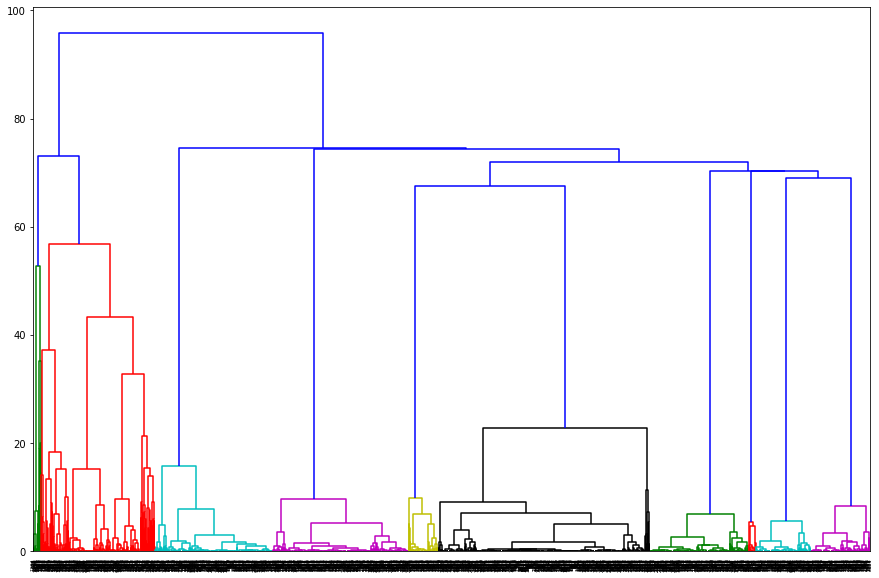

In [60]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

Получилось очень "ветвистое" дерево с большим количеством веток. Вероятно, на их количество повлияло большое число категорий товаров, выведенных в столбцы. Чтобы не делить пользователей на группы только в соответствии с категорией купленного ими товара, укрупним эти группы. 

Зададим кластеры на основе алгоритма K-Means с числом кластеров, равным 5 - по числу крупных разветвлений второго/третьего уровней.

In [61]:
km = KMeans(n_clusters = 5, random_state=0)

In [62]:
labels = km.fit_predict(X_st)

In [63]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
data_for_classification['cluster'] = labels

In [65]:
data_for_classification.groupby(['cluster']).mean()

,number_of_orders,revenue,number_of_categories,avg_number_of_positions,type_Ванная,type_Декор,type_Инструменты,type_Кухня,type_Сад,type_Скобяные изделия,type_Спальня,type_Сушилки и гладильные доски,type_Хозяйственные товары,type_Хранение
cluster,,,,,,,,,,,,,,
0,1.107317,1318.978049,1.024390,1.054878,0.002439,0.012195,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.004878,0.004878
1,1.246753,1132.178571,1.048701,1.137987,0.006494,0.012987,0.006494,1.000000,0.000000,0.000000,0.003247,0.009740,0.003247,0.006494
2,1.237768,940.981116,1.006009,1.168240,0.141631,0.529614,0.000000,0.000000,0.080687,0.017167,0.012017,0.000000,0.074678,0.150215
3,9.603774,2087.382075,1.900943,8.184075,0.047170,0.764151,0.014151,0.066038,0.872642,0.000000,0.014151,0.018868,0.047170,0.056604
4,1.104520,2451.533898,1.019774,1.048964,0.000000,0.005650,0.994350,0.000000,0.000000,0.002825,0.005650,0.000000,0.002825,0.008475


In [66]:
data_for_classification['cluster'].value_counts()

2    1165
0     410
4     354
1     308
3     212
Name: cluster, dtype: int64

Мы получили 5 групп, для каждой из которых можно выделить более или менее характерные признаки.

Группа 4. Самые "богатые" клиенты, приносящие нам больше всего денег - в среднем почти 2500 рублей. Основная категория товаров, которые они приобретают, это инструменты (как мы помним, эта категория была среди тех, что приносят нам больше всего денег). Поэтому в целом, такая связь логична. При этом почти все эти клиенты сделали по 1 заказу и купили только 1 товар.

Группа 3. Клиенты с признаками оптовиков. Они делают больше всего заказов: в среднем более 9, при этом оставляют в магазине также сумму больше среднего: более 2000 рублей. Еще один признак "оптовости" их заказа - число позиций в заказе (в среднем 8). Т.е. они покупают недорогой товар, но в большом количестве. Они же больше всех склонны покупать товары разных категорий.

Представители групп 0-2 - "средний класс". У них примерно одинаковое число заказов (по 1), число позиций в заказе (1) и остаили они в нашем магазине похожие суммы денег (940-1318 рублей). Это в основном покупатели, которые пришли за одним товаром конкретной категории и больше не возвращались. Отличаются эти группы категориями товаров, которые они склонны покупать:
для Группы 0 это Сушилки и гладильные доски, для Группы 1 - товары категории Кухня. Клиенты самой многочисленной группы 2 покупают разные товары, но в основном предметы декора.

# Раздел 3. Проверка статистических гипотез

Как мы видели ранее, у нас есть только небольшое число клиентов, делающих больше 1 заказа в нашем интернет-магазине. Кластеризация выявила 2 группы клиентов с "повышенными" показателями числа заказов и приносимой выручки. 
Чтобы лучше сформулировать предложение для клиентов в зависимости от принадлежности их к тому или иному кластеру, сформулируем и проверим статистические гипотезы. Будем считать группы 0-2 "контрольными", а группы 3 и 4 - "тестовыми".

Тогда проверим ряд гипотез о статистической значимости различий в среднем чеке заказа между группами.

В первом случае гипотеза Н0 будет выглядеть следующим образом: Нет статистически значимых различий между средним чеком группы 3 и групп 0, 1 и 2 (по очереди). Тогда Н1: Есть статистически значимые различия между средним чеком группы 3 и групп 0, 1 и 2.

Во втором случае Н0 : Нет статистически значимых различий между средним чеком группы 4 и групп 0, 1, 2. Н1: Есть статистически значимые различия между средним чеком группы 4 и групп 0, 1, 2.

Для отображения среднего чека добавим соответствующую колонку к датасету.

In [67]:
data_for_classification['avg_revenue'] = data_for_classification['revenue'] / data_for_classification['number_of_orders']

Создадим функцию для попарной проверки гипотез и вычисления разницы между значениями среднего чека групп. Воспользуемся двусторонним тестом Манна-Уитни.

In [76]:
def p_value(group1, group2, alpha):
    p_value = stats.mannwhitneyu(data_for_classification[data_for_classification['cluster']== group1]\
            ['avg_revenue'], data_for_classification[data_for_classification['cluster']\
            == group2]['avg_revenue'], True, 'two-sided')[1]
    print('p-значение для групп', group1, 'и',group2, ':', p_value)
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между средним чеком групп есть разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет статистически значимых различий между средним чеком групп")
    difference = data_for_classification[data_for_classification['cluster']== group1]['avg_revenue'].mean()\
            / data_for_classification[data_for_classification['cluster'] == group2]['avg_revenue'].mean()-1
    print('Средний чек группы', group1, 'по отношению к группе',group2, ':', difference)

In [77]:
p_value(3, 0, 0.05)

p-значение для групп 3 и 0 : 1.0187735071414796e-72
Отвергаем нулевую гипотезу: между средним чеком групп есть разница
Средний чек группы 3 по отношению к группе 0 : -0.8029970825530839


In [78]:
p_value(3, 1, 0.05)

p-значение для групп 3 и 1 : 2.513961290762701e-37
Отвергаем нулевую гипотезу: между средним чеком групп есть разница
Средний чек группы 3 по отношению к группе 1 : -0.7301202327402037


In [79]:
p_value(3, 2, 0.05)

p-значение для групп 3 и 2 : 4.663972024962632e-25
Отвергаем нулевую гипотезу: между средним чеком групп есть разница
Средний чек группы 3 по отношению к группе 2 : -0.7144432615355827


Во всех трех случаях получили p-value меньше уровня значимости 0,05. Значит, нулевую гипотезу об отсутствии статистически значимых различий в средних чеках групп 3 и 0-1-2 отвергаем: средние чеки нельзя считать равными. При этом средний чек группы 3 на 71-80% ниже, чем у групп 0-2: это значит, что в группу 3 у нас попали клиенты с очень низким средним чеком. При этом, как мы помним, они склонны делать несколько заказов. Почему так происходит? Возможно, они пришли однажды за каким-то дешевым товаром, их всё устроило, и они возвращались вновь, чтобы купить что-то еще из бюджетных вещей. Таким клиентам будут наиболее интересны акции и скидки, предложения со специальной сниженной ценой.

Аналогичным образом проверим гипотезу о статистически значимых различиях между средним чеком группы 4 и групп 0-2.

In [80]:
p_value(4, 0, 0.05)

p-значение для групп 4 и 0 : 4.799017895059311e-17
Отвергаем нулевую гипотезу: между средним чеком групп есть разница
Средний чек группы 4 по отношению к группе 0 : 0.7866119896490171


In [81]:
p_value(4, 1, 0.05)

p-значение для групп 4 и 1 : 1.7789589399583003e-27
Отвергаем нулевую гипотезу: между средним чеком групп есть разница
Средний чек группы 4 по отношению к группе 1 : 1.4475293777309823


In [83]:
p_value(4, 2, 0.05)

p-значение для групп 4 и 2 : 1.7745104566254578e-63
Отвергаем нулевую гипотезу: между средним чеком групп есть разница
Средний чек группы 4 по отношению к группе 2 : 1.5897032352481184


Здесь также p-value меньше альфа, а значит, нулевую гипотезу отвергаем: средние чеки в группе 4 и в группах 0-2 разные. Причем в 4 группе он выше, чем в других на 79%, 145% и даже 159%! Такие клиенты нам как магазину, безусловно, интересны: они тратят больше всег денег, но приходят почему-то редко. Нужно постараться замотивировать таких клиентов на более частое посещение интернет-магазина. 

Мы попарно сравнивали результаты по 3 группам в двух разрезах. Т.е. проделали множественное тестирование с 6 сравнениями.

Чтобы снизить вероятность ложнопозитивного результата при множественном тестировании гипотез, нужно скорректировать уровень значимости для уменьшения групповой вероятности ошибки первого рода.
Применим метод Шидака для корректировки уровня значимости.

In [94]:
alpha_shidak = 1 - (1 - 0.05)**(1/6)
alpha_shidak

0.008512444610847103

Еще раз сравним все полученные p-value с новым alpha.

In [95]:
p_value(3, 0, alpha_shidak)

p-значение для групп 3 и 0 : 1.0187735071414796e-72
Отвергаем нулевую гипотезу: между средним чеком групп есть разница
Средний чек группы 3 по отношению к группе 0 : -0.8029970825530839


In [96]:
p_value(3, 1, alpha_shidak)

p-значение для групп 3 и 1 : 2.513961290762701e-37
Отвергаем нулевую гипотезу: между средним чеком групп есть разница
Средний чек группы 3 по отношению к группе 1 : -0.7301202327402037


In [97]:
p_value(3, 2, alpha_shidak)

p-значение для групп 3 и 2 : 4.663972024962632e-25
Отвергаем нулевую гипотезу: между средним чеком групп есть разница
Средний чек группы 3 по отношению к группе 2 : -0.7144432615355827


In [98]:
p_value(4, 0, alpha_shidak)

p-значение для групп 4 и 0 : 4.799017895059311e-17
Отвергаем нулевую гипотезу: между средним чеком групп есть разница
Средний чек группы 4 по отношению к группе 0 : 0.7866119896490171


In [99]:
p_value(4, 1, alpha_shidak)

p-значение для групп 4 и 1 : 1.7789589399583003e-27
Отвергаем нулевую гипотезу: между средним чеком групп есть разница
Средний чек группы 4 по отношению к группе 1 : 1.4475293777309823


In [100]:
p_value(4, 2, alpha_shidak)

p-значение для групп 4 и 2 : 1.7745104566254578e-63
Отвергаем нулевую гипотезу: между средним чеком групп есть разница
Средний чек группы 4 по отношению к группе 2 : 1.5897032352481184


Результат не изменился. Значит действительно можно считать средние чеки по группам различными.

# Раздел 4. Выводы и рекомендации по работе с группами клиентов

## Раздел 4.1. Общие выводы

Проведенный анализ выявил проблемы, связанные в основном с закрепляемостью покупателей: 90% клиентов совершает на сайте 1 заказ, 86% заказов содержат 1 позицию. Кроме того, не видно динамики в росте продаж и скачков в возможные "пиковые" для интернет-магазинов периоды. Поэтому прежде, чем привлекать покупателей, желательно провести исследование причин описанных явлений. Следует рассмотреть проблему с трех основных ракурсов.
1. Очень много «одноразовых» клиентов – нужно проанализировать пользовательский опыт. Возможные причины оттока:
 - Неудобный сайт -> провести UX/UI тестирование, проработать мобильную версию и приложение (тренд последних лет – превышение роста числа покупок с мобильных устройств над десктопом)
 - Некачественный товар-> провести работу над качеством
 - Маленький ассортимент-> расширить линейки продуктов наиболее популярных и доходных категорий (Инструменты, Сушилки и гладильные доски, Декор, Кухня)
 - Плохой сервис-> разрабоать регламенты и нормативы по предоставлению качественного сервиса (сроки, доставка, обратная связь и т.д.)
 - Пользователи «забыли» про сайт-> разработать и внедрить программу лояльности с накопительными бонусами и скидками


2. Основная часть клиентов покупает по 1 товару:
 - Добавить на сайте блок с рекомендациями «С этим товаром покупают» в карточке товара или в корзине (пример: купившим домашний цветок точно понадобится грунт, купившим рассаду – лопатка)


3. Продажи на одинаковом уровне в течение года:
 - Принимать участие (и активно об этом рассказывать) в популярных распродажах: Black Friday, новогодней, летней
 - Устраивать акционные мероприятия, например, перед дачным сезоном: пополнение ассортимента и скидки на товары категории Сад


## Раздел 4.2. Рекомендации по работе с клиентами

Среди 5 сформированных групп 3 обладают похожими характеристиками, различаясь в основном приоритетной категорией товаров. Мы отнесли эти группы (под номерами <b>0, 1 и 2</b>) к некоему "среднему классу". Они делают по 1 заказу, содержащему 1 позицию, и тратят на нашем сайте мало денег.

Что делать с такими клиентами?

Т.к. клиенты теряются после одного заказа - нужно их «догнать». Возможный план мероприятий:
- реклама: контекст, соцсети (в зависимости от бюджета и целей),
- триггерные e-mail рассылки «Вы давно к нам не приходили» или «В вашей корзине остались товары» со списком персонализированных предложений,
- опрос клиентов с целью выяснить причину ухода: e-mail рассылка с анкетой или телефонный опрос.

Клиенты покупают недорогой товар, значит надо делать упор на акции и скидки. Например, присылать e-mail и СМС с подборкой выгодных предложений. Запустить акцию 1+1 (это даст чувство приобретения ощутимой выгоды).

Кроме этого, в зависимоти от любимой категории пользователя, можно предложить сопутствующие товары  или другие популярные товары (вывести топ SKU по продажам по самым доходным категориям). <b>Для группы 0</b> - это Сушилки и гладильные доски (таким сопутствующим товаром могут стать, например, чехлы, подрукавники, подкладки под чехлы), <b>для 1</b> - Кухня (универсальные товары: салфетки, губки), <b>2</b> - Декор (к цветам всегда можно предложить грунт или кашпо).


<b>Для представителей группы 3</b>, обладающих признаками оптовиков, но при этом имеющих самый маленький средний чек, также важно давать акции и скидки. Кроме этого, т.к. эти клиенты, по сути, являются самыми лояльными для нас, но при этом тратят не так много денег, как хотелось бы, нужно акцентировать внимание на  допродажах. Возможные варианты действий:
- предлагать на этапе оформления заказа (в корзине) подборку товаров «Вам может понравиться» с самыми продаваемыми категориями тех товаров, которые находятся в корзине,
- предлагать скидку на второй товар аналогичной категории в чеке (хорошо применимо, например, к семенам и рассаде. При покупке огурцов можно получить тыкву по более низкой цене), 
- программа «Приведи друга» - скидка на следующий заказ за приведенного друга, совершившего покупку.

<b>Представители группы 4</b> - самые "богатые". Им скорее будут интересны не акции, а понимание ценности приобретаемого товара. В работе с ними важно делать упор на качество продукции. Рассказывать о перимуществах, особенностях, способах использования в формате видеоблогов/в постах в соцсетях/на сайте в специальном разделе.

Таким образом, чтобы вывести продажи магазина "Пока все ещё тут" на высокий уровень, а также сохранить клиентов, нужно проделать большую разнонаправленную работу.